# Task 3: Predictive Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

In [8]:
customer_profile = pd.read_csv('../dataset/customer_profile_kmeans.csv', sep='\t', index_col=0)
customer_profile

,I,Iu,Imax,E,Savg,R,F,M,label
CustomerID,,,,,,,,,
12747.0,0.781294,0.179243,0.010851,0.640492,0.521052,-0.495949,0.647544,1.350495,medium
12748.0,2.973640,3.219346,2.040581,0.469773,-0.756206,-1.674081,3.484271,2.976379,medium
12749.0,1.001305,1.331669,1.313557,0.530165,1.478730,-0.495949,1.262206,1.434270,medium
12820.0,0.497275,0.461147,0.168180,0.194257,-0.169440,-0.040022,0.344508,0.288842,high
12821.0,-1.220257,-1.355695,-1.062497,-0.668670,-1.461621,0.475504,-1.388044,-1.591474,low
...,...,...,...,...,...,...,...,...,...
18280.0,-1.545456,-0.936801,-1.497962,-0.728760,-0.537751,0.823325,-1.000854,-1.050842,low
18281.0,-1.411263,-1.229286,-1.318268,-0.732228,-1.651965,-1.674081,-1.271203,-1.702860,low
18282.0,-0.972606,-0.787292,-1.062497,0.054425,-1.529306,1.027723,-0.862659,-1.069004,low


In [9]:
customer_profile = customer_profile.to_numpy()

In [10]:
def plot_learning_curve(estimator, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5), 
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(estimator.__class__.__name__) + ' learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend().get_frame().set_facecolor('white')
    plt.show()
    
def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

## SVC

In [11]:
from sklearn.svm import SVC

In [12]:
X, y = customer_profile[:, :-1], customer_profile[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

tuned_parameters = {'kernel': ('linear', 'poly', 'rbf'),
                    'C': (0.1, 1, 10, 100, 1000)}

grid = GridSearchCV(SVC(),
                    param_grid=tuned_parameters,
                    scoring='accuracy',
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full development set
                    return_train_score=True,
                    verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


In [13]:
df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
df.rename(columns={'mean_test_score': 'mean_val_score', 
                   'rank_test_score': 'rank_val_score'}, inplace=True)

df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

params,mean_train_score,mean_val_score,rank_val_score
"{'C': 100, 'kernel': 'linear'}",0.999123,0.997195,1
"{'C': 1000, 'kernel': 'linear'}",0.999825,0.997195,2
"{'C': 10, 'kernel': 'linear'}",0.995968,0.994041,3
"{'C': 1, 'kernel': 'linear'}",0.994302,0.993341,4
"{'C': 1, 'kernel': 'rbf'}",0.994302,0.990183,5
"{'C': 10, 'kernel': 'rbf'}",0.996318,0.989832,6
"{'C': 0.1, 'kernel': 'linear'}",0.991936,0.988433,7
"{'C': 1000, 'kernel': 'rbf'}",1.000000,0.988078,8
"{'C': 100, 'kernel': 'rbf'}",0.999123,0.986676,9
"{'C': 1000, 'kernel': 'poly'}",0.998597,0.985625,10


In [14]:
accuracy_score(grid.best_estimator_.predict(X_test), y_test)

0.9978969505783386

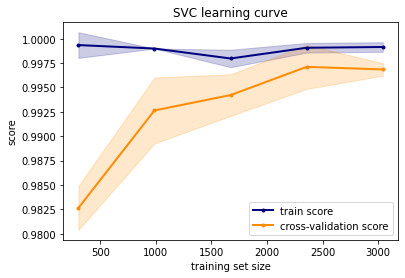

In [15]:
plot_learning_curve(grid.best_estimator_, X, y)

## Naive Bayes

## Random Forest

## Gradient Boosting

## Decision Tree

## K-Nearest Neighbors

## Logistic Regression